# S-N曲線
ここまでで使用した疲労データを元にS-N曲線を作図する。  
今回は，アルミで最も多く使用される片対数曲線回帰モデルを使用する。  

In [51]:
import pandas as pd

filepath = "./datas/2-3_fatigue_life_on_Kb108.csv"
df = pd.read_csv(filepath)
print(df)



    No.  275 MPa  265 MPa  245 MPa  226 MPa  206 MPa  186 MPa  177 MPa  \
0     1  27200.0    31700    51100    78400   131800   213100   282100   
1     2  27600.0    32400    53200    79200   133900   218900   284200   
2     3  28900.0    33200    53500    79800   136700   222500   291400   
3     4  29300.0    33700    54200    82300   137100   234000   311700   
4     5  29900.0    35500    55000    85800   139300   241500   345900   
5     6  30100.0    35700    57000    86000   140100   246800   317600   
6     7  30600.0    35900    57000    86600   140400   248600   331300   
7     8  30700.0    36000    57200    88100   145700   251200   335300   
8     9  30800.0    36500    57700    88500   145900   251300   391600   
9    10  30900.0    36800    58400    88700   146000   252700   405900   
10   11  30900.0    37000    58500    89300   146900   255600   411500   
11   12  31000.0    37000    59200    90300   148600   261600   418800   
12   13  31200.0    37200    59300    

読み込んだデータを，応力，回数の形に整形する。
応力は単位を含む文字列になっているので，数値部分のみを抜き出す。

In [52]:
import numpy as np
data = np.array(df.iloc[:,[1]]).squeeze()
cycleN = data[~np.isnan(data)]
stress = np.full((len(cycleN)), int(df.columns[1][:3])) 
SNdata = np.vstack([stress, cycleN]).transpose()


In [53]:
SNdata

array([[  275., 27200.],
       [  275., 27600.],
       [  275., 28900.],
       [  275., 29300.],
       [  275., 29900.],
       [  275., 30100.],
       [  275., 30600.],
       [  275., 30700.],
       [  275., 30800.],
       [  275., 30900.],
       [  275., 30900.],
       [  275., 31000.],
       [  275., 31200.],
       [  275., 31200.],
       [  275., 31700.],
       [  275., 31800.],
       [  275., 31900.],
       [  275., 32100.],
       [  275., 32400.],
       [  275., 32400.],
       [  275., 34900.]])

全ての応力に対してループする。

In [60]:
import numpy as np
for i in range(len(df.columns)-2):
    data = np.array(df.iloc[:,[i+1]]).squeeze()
    cycleN = data[~np.isnan(data)]
    stress = np.full((len(cycleN)), int(df.columns[i+1][:3]))
    if i==0:
        SNdata = np.vstack([cycleN, stress])
    else:
        SNdata = np.hstack([SNdata, np.vstack([cycleN, stress])])

In [61]:
SNdata

array([[2.72000e+04, 2.76000e+04, 2.89000e+04, 2.93000e+04, 2.99000e+04,
        3.01000e+04, 3.06000e+04, 3.07000e+04, 3.08000e+04, 3.09000e+04,
        3.09000e+04, 3.10000e+04, 3.12000e+04, 3.12000e+04, 3.17000e+04,
        3.18000e+04, 3.19000e+04, 3.21000e+04, 3.24000e+04, 3.24000e+04,
        3.49000e+04, 3.17000e+04, 3.24000e+04, 3.32000e+04, 3.37000e+04,
        3.55000e+04, 3.57000e+04, 3.59000e+04, 3.60000e+04, 3.65000e+04,
        3.68000e+04, 3.70000e+04, 3.70000e+04, 3.72000e+04, 3.75000e+04,
        3.75000e+04, 3.76000e+04, 3.76000e+04, 3.79000e+04, 3.82000e+04,
        3.86000e+04, 3.94000e+04, 3.96000e+04, 4.03000e+04, 4.05000e+04,
        4.07000e+04, 4.08000e+04, 4.09000e+04, 4.10000e+04, 4.13000e+04,
        4.27000e+04, 5.11000e+04, 5.32000e+04, 5.35000e+04, 5.42000e+04,
        5.50000e+04, 5.70000e+04, 5.70000e+04, 5.72000e+04, 5.77000e+04,
        5.84000e+04, 5.85000e+04, 5.92000e+04, 5.93000e+04, 5.98000e+04,
        5.98000e+04, 6.09000e+04, 6.14000e+04, 6.14

In [62]:
import matplotlib.pyplot as plt
def show_scatter(x,y, label, lim_frag=0):
    xlabel, ylabel = label
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xscale("log")
    if lim_frag == 1:
        plt.ylim(0,1)
    plt.show()

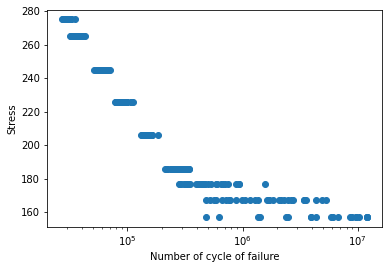

In [63]:
label = ("Number of cycle of failure", "Stress")
show_scatter(SNdata[0],SNdata[1], label)

## 非線形回帰
excelNo標準回帰は，線形回帰しか対応していない。

In [70]:
from scipy.optimize import curve_fit

In [73]:
def function(x,A,B,D):
    return  np.power(10, B-A*np.log10(x)) * D

In [86]:
param_ini = (0.12, 1.83, 14)
param, cov = curve_fit(function, SNdata[0], SNdata[1])
print(param)

[ 0.12612317  1.83991382 13.99882571]


C:\Users\Yusaku\AppData\Local\Temp\ipykernel_35052\3397436800.py:2: RuntimeWarning: overflow encountered in power
  return  np.power(10, B-A*np.log10(x)) * D


In [87]:
def show_plot(x, y, label, lim_frag=0):
    xlabel, ylabel = label
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xscale("log")
    if lim_frag == 1:
        plt.ylim(0,1)
    plt.show()

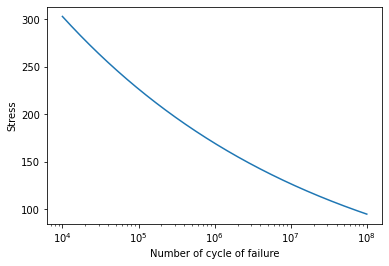

In [88]:
x = np.logspace(np.log10(1e4), np.log10(1e8),1000)
y = function(x,param[0],param[1],param[2])
show_plot(x, y, label)

In [89]:
import matplotlib.pyplot as plt
def show_scatter_plot(scatter, plot, label, lim_frag=0):
    xlabel, ylabel = label
    x,y=scatter; plt.scatter(x,y)
    x,y=plot; plt.plot(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xscale("log")
    if lim_frag == 1:
        plt.ylim(0,1)
    plt.show()

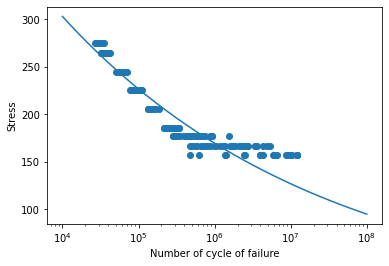

In [90]:
scatter = (SNdata[0],SNdata[1]); plot = (x,y)
show_scatter_plot(scatter, plot, label)